In [8]:
from fenics import *
import crosssection
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt




control = solution_io.load_solution(f"{settings.outputfolder}/2d_control.h5")
wider_icestream = solution_io.load_solution(f"{settings.outputfolder}/2d_wider_icestream.h5")



In [11]:

usol = control[1]




2.338090306261105e-05

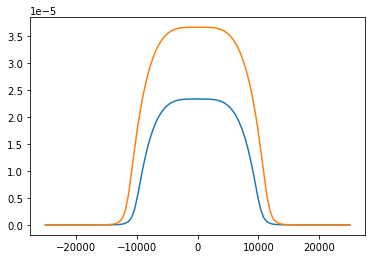

In [16]:
def plot_surface(results):
    mesh = results[0]
    usol = results[1]
    vfun = usol.sub(2)
    psol = results[2]
    experiment = results[3]
    domain_w = experiment["domain_size"][1]
    domain_h = experiment["domain_size"][2]
    x = np.linspace(-domain_w/2,domain_w/2,100)
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    plt.plot(x,v,label=experiment['name'])

plot_surface(control)
plot_surface(wider_icestream)
